# Analysis of Consumer Service Choice Preferences at a Water Park: A Comparison of Online and Offline Channels in May 2023

## Request from a client

Task 1.

We want to investigate how much importance in visitor attendance at a certain hypothetical water park operated by Droplabs is the guests on online tickets in relation to all guests for May 2023.


For stationary sales, the water park uses a separate sales system than Droplabs. It uses the Droplabs system to sell online.


We asked this customer to send us a ticket sales list from the ticket office for May 2023. We also extracted data from our internal analytical system on the number of people on online tickets used in May 2023.


Attached is a file sent by the customer and a file with an extract from the internal system. Your task is to indicate the share of guests with online tickets to all guests on a monthly basis collectively.


Task 2.

Present what is the average revenue per guest from admission tickets on each day of May 2023 in the water park from task No. 1.


Task 3.

Discuss your observations on the differences/similarities in consumer service choice preferences for the online and offline sales channel for the water park from task 1.


Task 4.

Another tourist attraction - a potential customer of Droplabs asked for a quote for the annual cost of handling by Droplabs. We asked him to send historical data on the volume, to which he sent the file included in the attachment. Make a calculation taking into account the following terms of cooperation:

- PLN 759.00 net subscription / month,

- 3.50% commission on the ticket value, but not less than PLN 0.38 / ticket item.

## Import packages & Mount Drive

Let's import the necessary libraries for data manipulations and visualizations

In [ ]:
# install Excel package
!pip install openpyxl

# Import Analytic and Visualization Lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Google Drive
from google.colab import drive

# Mount Drive
drive.mount('/content/drive')

# specify file path
file_path = '/content/drive/My Drive/droplabs/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data
Here, we are loading the data from Google Drive directory specified in the previous code cell. The client provided us with 3 different datasets for this analysis.

In [ ]:
# Load the data from the provided Excel files
offline_ticket_data = pd.read_excel(file_path + 'file1_offline_data.xlsx')
online_attendance_data = pd.read_excel(file_path + 'file2_attendance.xlsx')
potential_client_data = pd.read_excel(file_path + 'file3_salary.xlsx')


# Data Preview and Inspection

In this section, we want to preview the dataset and carefully inspect the data structure, note down our observations and plan for data cleaning and (preprocessing if necessary.

In [ ]:
# Offline Tariff report
offline_ticket_data.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Raport taryf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Data wejścia,Nr dok.,Bilet,Cena brutto,Ilość,NaN,Wartość brutto
4,NaN,2023-05-01 09:58:02.953000,PZEW0014758/5/MG/2023,BASEN CAŁY DZIEŃ,142,4,NaN,568
5,NaN,2023-05-01 09:58:37.910000,PAR0040925/5/MG/2023,BASEN CAŁY DZIEŃ,142,2,NaN,284
6,NaN,2023-05-01 09:59:29.383000,PZEW0014759/5/MG/2023,BASEN 2+2 RODZINNY 3H,262,1,NaN,262
7,NaN,2023-05-01 10:00:08.260000,PZEW0014760/5/MG/2023,BASEN CAŁY DZIEŃ,142,2,NaN,284
8,NaN,2023-05-01 10:00:15.747000,PAR0040926/5/MG/2023,BASEN 2+1 RODZINNY 3H,214,1,NaN,214
9,NaN,2023-05-01 10:00:16.263000,PAR0040928/5/MG/2023,BASEN DZIECKO DO 16 LAT 3H,63,3,NaN,189


In [ ]:
# Attendance
online_attendance_data.head(10)

,Property Sum,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Using ticket (Success),Participants,Activity Name,Variant Name,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Activity Name; Variant Name,2023-05-01 00:00:00,2023-05-02 00:00:00,2023-05-03 00:00:00,2023-05-04 00:00:00,2023-05-05 00:00:00,2023-05-06 00:00:00,2023-05-07 00:00:00,2023-05-08 00:00:00,2023-05-09 00:00:00,...,2023-05-22 00:00:00,2023-05-23 00:00:00,2023-05-24 00:00:00,2023-05-25 00:00:00,2023-05-26 00:00:00,2023-05-27 00:00:00,2023-05-28 00:00:00,2023-05-29 00:00:00,2023-05-30 00:00:00,2023-05-31 00:00:00
3,Bilet wstępu całodzienny - rodzinny; Rodzina 2+2,24.0,48.0,8.0,0.0,0.0,8.0,4.0,0.0,0.0,...,0.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0
4,Bilet 3h do strefy basenowej; Dorośli i młodzież,5.0,18.0,13.0,10.0,0.0,7.0,11.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
5,Bilet wstępu całodzienny; Dorośli i młodzież,15.0,13.0,16.0,0.0,2.0,4.0,2.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,9.0,7.0,2.0,3.0,2.0
6,Bilet wstępu 3h - rodzinny; Rodzina 2+2,12.0,16.0,16.0,4.0,4.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,4.0,0.0,0.0,0.0,0.0
7,Bilet wstępu 3h - rodzinny; Rodzina 2+1,9.0,21.0,3.0,0.0,0.0,9.0,12.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
8,Bilet wstępu całodzienny - rodzinny; Rodzina 2+1,0.0,9.0,18.0,6.0,3.0,0.0,6.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
9,Bilet wstępu 2h - rodzinny; Rodzina 2+2,12.0,0.0,4.0,0.0,8.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

#Data on how many tickets were sold at the customer's in a given month - divided into online and stationary sales channels
potential_client_data.head(10)

,Dane dotyczące tego ile sztuk biletów zostało sprzedanych u klienta w danym miesiącu - w rozbiciu na kanał online i kanał sprzedaży stacjonarnej,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,rok,miesiąc,liczba biletów zakupionych w kasie,liczba biletów zakupionych online,NaN,NaN,liczba biletów zakupionych w kasie,liczba biletów zakupionych online
1,2022,sierpień,142073,4086,2023.0,styczeń,0,915
2,2022,wrzesień,56795,2890,2023.0,luty,0,782
3,2022,październik,111647,4134,2023.0,marzec,0,748
4,2022,listopad,19554,907,2023.0,kwiecień,20181,3076
5,2022,grudzień,3858,689,2023.0,maj,72082,4123
6,NaN,NaN,NaN,NaN,2023.0,czerwiec,56252,3046
7,NaN,NaN,NaN,NaN,2023.0,lipiec,106529,5641
8,NaN,NaN,NaN,NaN,2023.0,sierpień,129608,9288
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Inspection**

-  **File 1 (Offline ticket sales):** The dataset has header starting from the 4th row. It includes columns such as date, document number, ticket type, gross price, quantity, and gross value. The first and sixth columns are empty.

- **File 2 (Online Attendance)**: The file includes daily data on the number of participants using online tickets. The first two rows contain meta-information, with actual data starting around the 4th row.

- **File 3 (Potential client data):** The file contains historical ticket sales information with columns for the number of tickets sold offline and online by month and year. The header begins from the second row.

  ### **Data cleaning steps:**

- Reloading the data and skip rows with Metadata
- Drop empty columns and rows
- Rename columns with understandable names
- Convert columns to their correct data type
- Merge file 1 and file 2

In [ ]:

# Reload File 1 (Offline ticket sales) and skip rows with Metadata, specify header
offline_ticket_data = pd.read_excel(file_path + 'file1_offline_data.xlsx',  skiprows = 4)

In [ ]:
# File 1 (Offline ticket sales)
# Drop empty columns
df1 = offline_ticket_data.drop(['Unnamed: 0', 'Unnamed: 6'], axis=1)

# Rename columns to more understandable names
df1 = df1.rename(columns={'Data wejścia': 'datetime', 'Nr dok.' : 'refid', 'Bilet' : 'ticket_type', \
                                                'Cena brutto' : 'GrossPrice', 'Ilość' : 'offline participants', 'Wartość brutto' : 'GrossValue'})

# Create separate date and time columns
df1['date'] = df1['datetime'].dt.date
df1['time'] = df1['datetime'].dt.strftime('%H:%M:%S')

# Convert relevant columns to numeric
df1['GrossPrice'] = pd.to_numeric(df1['GrossPrice'], errors='coerce')
df1['offline participants'] = pd.to_numeric(df1['offline participants'], errors='coerce')
df1['GrossValue'] = pd.to_numeric(df1['GrossValue'], errors='coerce')
df1['date'] = pd.to_datetime(df1['date'])


# Reorder the columns to move 'date' and 'time' to the front
offline_ticket_data_clean = df1[['date', 'time', 'refid', 'ticket_type', 'GrossPrice', 'offline participants', 'GrossValue']]

offline_ticket_data_clean.head(10)

,date,time,refid,ticket_type,GrossPrice,offline participants,GrossValue
0,2023-05-01,09:58:02,PZEW0014758/5/MG/2023,BASEN CAŁY DZIEŃ,142,4,568
1,2023-05-01,09:58:37,PAR0040925/5/MG/2023,BASEN CAŁY DZIEŃ,142,2,284
2,2023-05-01,09:59:29,PZEW0014759/5/MG/2023,BASEN 2+2 RODZINNY 3H,262,1,262
3,2023-05-01,10:00:08,PZEW0014760/5/MG/2023,BASEN CAŁY DZIEŃ,142,2,284
4,2023-05-01,10:00:15,PAR0040926/5/MG/2023,BASEN 2+1 RODZINNY 3H,214,1,214
5,2023-05-01,10:00:16,PAR0040928/5/MG/2023,BASEN DZIECKO DO 16 LAT 3H,63,3,189
6,2023-05-01,10:01:11,PAR0040927/5/MG/2023,BASEN 2+1 RODZINNY 2H,173,1,173
7,2023-05-01,10:01:52,PZEW0014761/5/MG/2023,DZIECKO PONIŻEJ 3 ROKU ŻYCIA,1,1,1
8,2023-05-01,10:01:52,PZEW0014761/5/MG/2023,BASEN 2+1 RODZINNY 3H,214,1,214
9,2023-05-01,10:01:58,PAR0040929/5/MG/2023,BASEN 2+2 RODZINNY 3H,262,1,262


In [ ]:
# Aggregating total offline guests
offline_guest_summary = offline_ticket_data_clean.groupby('date')['offline participants'].sum().reset_index()

print("Total offline guests:")
offline_guest_summary.head()

Total offline guests:


,date,offline participants
0,2023-05-01,322
1,2023-05-02,464
2,2023-05-03,566
3,2023-05-04,243
4,2023-05-05,120


In [ ]:
# Reload File 2 (Online Attendance)
online_attendance_data = pd.read_excel(file_path + 'file2_attendance.xlsx', skiprows = 2, header = 1)

# Renaming columns for clarity
online_attendance_data.columns = ['Activity_Variant', '2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-05',
                                     '2023-05-06', '2023-05-07', '2023-05-08', '2023-05-09', '2023-05-10', '2023-05-11',
                                     '2023-05-12', '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16', '2023-05-17',
                                     '2023-05-18', '2023-05-19', '2023-05-20', '2023-05-21', '2023-05-22', '2023-05-23',
                                     '2023-05-24', '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29',
                                     '2023-05-30', '2023-05-31']

# Split the first column into two new columns 'Activity' and 'Variant'
online_attendance_data[['Activity', 'Variant']] = online_attendance_data.iloc[:, 0].str.split(';', expand=True)

# Drop the original first column
df2 = online_attendance_data.drop(online_attendance_data.columns[0], axis=1)

# Let's melt the dataset by transforming the dataframe from wide format to long format
df2 = df2.melt(id_vars=['Activity', 'Variant'], var_name='date', value_name='online participants')


# Convert date to datetime
df2['Date'] = pd.to_datetime(df2['date'])

# Convert Participants to numeric
df2['participants'] = pd.to_numeric(df2['online participants'], errors='coerce')

# Summarizing participants by date (to get the total online attendance per day)
online_attendance_summary = df2.groupby('date')['online participants'].sum().reset_index()

# Summary of online attendance
print("Total online guests:")
online_attendance_summary.head()

Total online guests:


,date,online participants
0,2023-05-01,82.0
1,2023-05-02,141.0
2,2023-05-03,84.0
3,2023-05-04,31.0
4,2023-05-05,17.0


In [ ]:
# Reload File 3 (Potential client data), skip first row
potential_client_data = pd.read_excel(file_path + 'file3_salary.xlsx', skiprows = 1)

# Renaming columns for clarity
potential_client_data.columns = ['year', 'month', 'offline tickets', 'online tickets', 'year', 'month', 'offline tickets', 'online tickets']
df2022 = potential_client_data.iloc[:5, :4]  # slicing data for 2022
df2023 = potential_client_data.iloc[:8, 4:8]  # slicing data for 2023
df3 = pd.concat([df2022, df2023], axis=0, ignore_index=True)
df3['year'] = pd.to_numeric(df3['year'])

df3.head()

,year,month,offline tickets,online tickets
0,2022,sierpień,142073.0,4086.0
1,2022,wrzesień,56795.0,2890.0
2,2022,październik,111647.0,4134.0
3,2022,listopad,19554.0,907.0
4,2022,grudzień,3858.0,689.0


# Task 1: Calculate the Share of Guests with Online Tickets
- let's proceed:

In [ ]:

# let's ensure dates from the datasets are in the same format
offline_guest_summary['date'] = pd.to_datetime(offline_guest_summary['date'])
online_attendance_summary['date'] = pd.to_datetime(online_attendance_summary['date'])

# Merging offline and online data by date
total_guests = pd.merge(offline_guest_summary, online_attendance_summary, on='date', how='outer')

# # Rename columns for clarity
total_guests.columns = ['date', 'OfflineGuests', 'OnlineGuests']

# Check for missing values
missing_values = total_guests.isnull().sum()
print("Null Count (Missing Values ): \n", missing_values, '\n')

Null Count (Missing Values ): 
 date             0
OfflineGuests    1
OnlineGuests     0
dtype: int64 



In [ ]:
# Fill NaN value in OfflineGusts with 0
total_guests['OfflineGuests'] = total_guests['OfflineGuests'].fillna(0)

# Calculate total guests and the share of online guests
total_guests['TotalGuests'] = total_guests['OfflineGuests'] + total_guests['OnlineGuests']
total_guests['DailyOnlineShare(%)'] = ((total_guests['OnlineGuests'] / total_guests['TotalGuests']) * 100).round(2)
# total_guests = round(total_guests, 2)

# Monthly total share of online guests
total_online_share = (total_guests['OnlineGuests'].sum() / total_guests['TotalGuests'].sum()) * 100
print(f"Overall online ticket share for May 2023: {total_online_share:.2f}%")

total_guests.head()
# offline_guest_summary.tail()

Overall online ticket share for May 2023: 10.47%


,date,OfflineGuests,OnlineGuests,TotalGuests,DailyOnlineShare(%)
0,2023-05-01,322.0,82.0,404.0,20.30
1,2023-05-02,464.0,141.0,605.0,23.31
2,2023-05-03,566.0,84.0,650.0,12.92
3,2023-05-04,243.0,31.0,274.0,11.31
4,2023-05-05,120.0,17.0,137.0,12.41


# Task 2: Average Revenue Per Guest
- Let's proceed:

In [ ]:
# Calculate total offline revenue per day
offline_revenue_summary = offline_ticket_data_clean.groupby('date')['GrossValue'].sum().reset_index()

# Merge revenue with total guests
summary_data_revenue_guests = pd.merge(offline_revenue_summary, total_guests, on='date')

# Calculate average revenue per guest
summary_data_revenue_guests['AvgRevenuePerGuest'] = (summary_data_revenue_guests['GrossValue'] / summary_data_revenue_guests['TotalGuests']).round(2)

# Output the daily average revenue
print("Daily Average Revenue per Guest \n", summary_data_revenue_guests[['date', 'AvgRevenuePerGuest']])

# Save solved tasks 1 and 2 to drive
summary_data_revenue_guests.to_excel('/content/drive/My Drive/droplabs/solved_tasks1&2.xlsx', index=False)

# Display the summary data
print("\nSummary Data with solved tasks:")
summary_data_revenue_guests.head()

Daily Average Revenue per Guest 
          date  AvgRevenuePerGuest
0  2023-05-01              100.95
1  2023-05-02               92.66
2  2023-05-03               96.03
3  2023-05-04               72.76
4  2023-05-05               87.64
5  2023-05-06              101.17
6  2023-05-07               91.38
7  2023-05-08               69.49
8  2023-05-09               54.73
9  2023-05-10               66.35
10 2023-05-11               68.92
11 2023-05-12               75.93
12 2023-05-13               91.22
13 2023-05-14               81.67
14 2023-05-15               83.90
15 2023-05-16               75.86
16 2023-05-17               74.72
17 2023-05-18               67.56
18 2023-05-19               83.95
19 2023-05-20               82.89
20 2023-05-21              104.43
21 2023-05-22               84.99
22 2023-05-23               85.49
23 2023-05-24               75.48
24 2023-05-25               73.36
25 2023-05-26               92.05
26 2023-05-27               90.65
27 2023-05-28 

,date,GrossValue,OfflineGuests,OnlineGuests,TotalGuests,DailyOnlineShare(%),AvgRevenuePerGuest
0,2023-05-01,40784,322.0,82.0,404.0,20.30,100.95
1,2023-05-02,56058,464.0,141.0,605.0,23.31,92.66
2,2023-05-03,62422,566.0,84.0,650.0,12.92,96.03
3,2023-05-04,19936,243.0,31.0,274.0,11.31,72.76
4,2023-05-05,12006,120.0,17.0,137.0,12.41,87.64


# Task 3: Consumer Preferences

1. Total Tickets Sold by Channel:

- **Observation:** The bar chart clearly shows a significant disparity between the number of tickets sold online versus offline. The offline channel has a dominant share of ticket sales, with over 5,000 tickets sold compared to less than 1,000 tickets sold online.
- **Insight:** This suggests that customers heavily prefer purchasing tickets through the offline channel. The reasons could range from the perceived ease of access at the physical location to perhaps lesser awareness or trust in the online purchasing system.

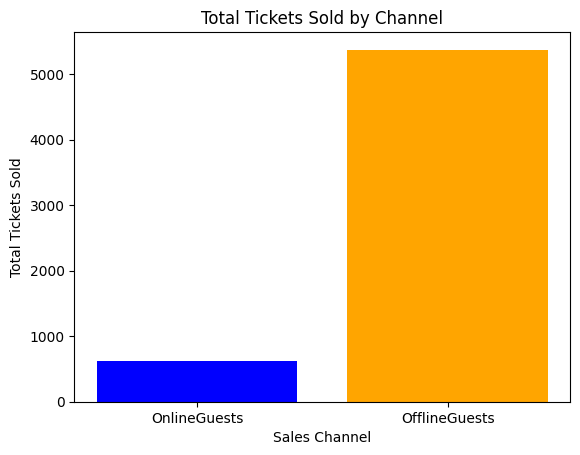

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'attendance_summary' dataframe from earlier
total_online = summary_data_revenue_guests['OnlineGuests'].sum()
total_offline = summary_data_revenue_guests['OfflineGuests'].sum()

channels = ['OnlineGuests', 'OfflineGuests']
totals = [total_online, total_offline]

plt.bar(channels, totals, color=['blue', 'orange'])
plt.xlabel('Sales Channel')
plt.ylabel('Total Tickets Sold')
plt.title('Total Tickets Sold by Channel')
plt.show()


**2. Revenue Share by Channel**

- **Observation:** The pie chart demonstrates that offline sales not only dominate in terms of ticket volume but also in revenue contribution, with almost 90% of the revenue being generated from offline ticket sales. Online sales account for just 10.4% of the total revenue.
- **Insight:** Although online sales are more convenient and possibly cheaper to operate, the significant revenue share coming from offline sales might indicate that customers purchasing offline are more likely to buy higher-priced tickets, or it could reflect a larger footfall in areas where online penetration is low.

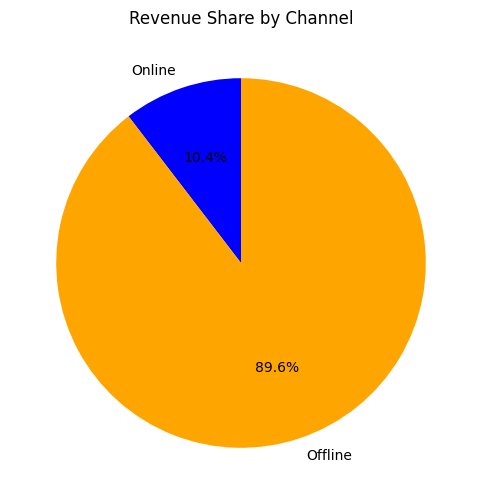

In [ ]:
# Pie Chart showing Revenue Share by Channel
plt.figure(figsize=(6, 6))
plt.pie(totals, labels=['Online', 'Offline'], autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Revenue Share by Channel')
plt.show()


**3. Ticket Sales Distribution Across Days of the Week:**

- **Observation:** The heatmap reveals that offline sales are consistent and higher throughout the week, with Wednesday showing the highest number of offline ticket sales. In contrast, online sales are relatively low across all days, with Tuesday seeing the highest online sales.
- **Insight:** The consistent offline sales suggest that visitors prefer purchasing tickets in person, possibly due to immediate access or habit. The slight uptick in online sales on Tuesday might indicate a pattern where users purchase online to avoid mid-week rushes or take advantage of promotions. The low online sales over the weekend could suggest that last-minute or spontaneous visitors prefer purchasing tickets at the venue.

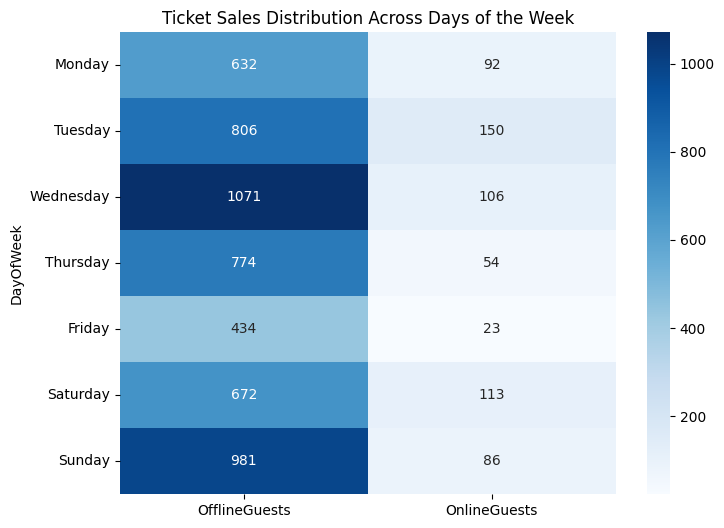

In [ ]:
# Heatmap: Sales Distribution Across Days of the Week

import seaborn as sns

# Creating a new column to extract the day of the week
summary_data_revenue_guests['DayOfWeek'] = pd.to_datetime(summary_data_revenue_guests['date']).dt.day_name()

# Create order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the DataFrame based on the day order
summary_data_revenue_guests['DayOfWeek'] = pd.Categorical(summary_data_revenue_guests['DayOfWeek'], categories=day_order, ordered=True)

# Pivot the data for heatmap
pivot_data = summary_data_revenue_guests.pivot_table(index='DayOfWeek', values=['OnlineGuests', 'OfflineGuests'], aggfunc='sum')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, cmap='Blues', fmt=".0f")
plt.title('Ticket Sales Distribution Across Days of the Week')
plt.show()


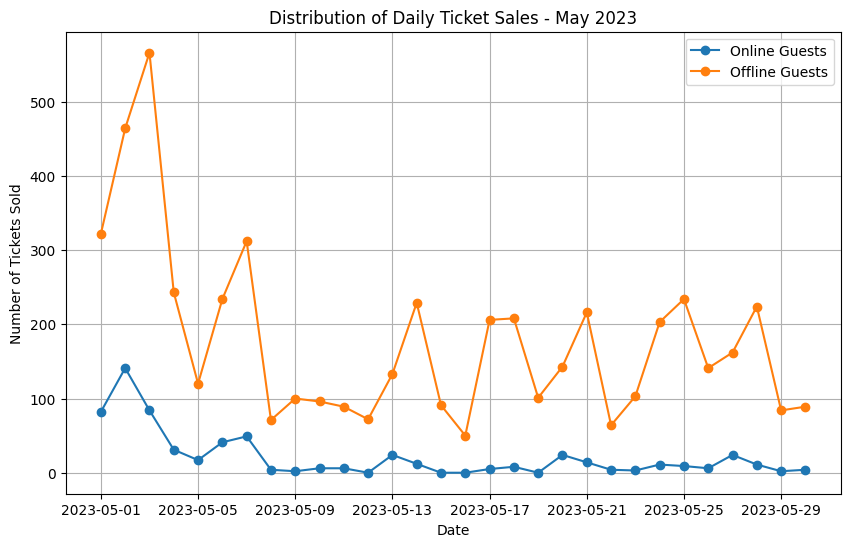

In [ ]:
# Line Chart to compare Daily Ticket Sales for May 2023
plt.figure(figsize=(10, 6))
plt.plot(summary_data_revenue_guests['date'], summary_data_revenue_guests['OnlineGuests'], label='Online Guests', marker='o')
plt.plot(summary_data_revenue_guests['date'], summary_data_revenue_guests['OfflineGuests'], label='Offline Guests', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Tickets Sold')
plt.title('Distribution of Daily Ticket Sales - May 2023')
plt.legend()
plt.grid(True)
plt.show()


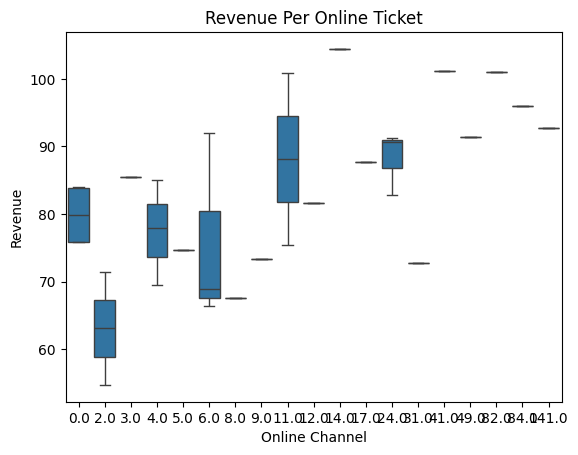

In [ ]:
# Box Plot: Revenue Per Online Ticket
sns.boxplot(x='OnlineGuests', y='AvgRevenuePerGuest', data=summary_data_revenue_guests)
plt.xlabel('Online Channel')
plt.ylabel('Revenue')
plt.title('Revenue Per Online Ticket')
plt.show()


### **Summary of the observations**
The visualizations highlight a strong preference for offline ticket purchases among visitors to the water park. This may be driven by a variety of factors including immediate access to tickets, the perception of better service, or the demographic characteristics of the visitors who may not be as comfortable with or aware of online purchasing options.

To potentially increase online sales, strategies could include enhancing the online purchasing experience, offering exclusive online discounts, or educating the target audience about the convenience and benefits of buying tickets online. Additionally, analyzing customer feedback could provide deeper insights into the specific reasons behind the preference for offline ticket purchases.

# Task 4: Calculation of Droplabs fees potential client
- Let's proceed:

In [ ]:
# Load file 3, skip first row
df3['total tickets'] = df3['offline tickets'] + df3['online tickets']

df3.head()

,year,month,offline tickets,online tickets,total tickets
0,2022,sierpień,142073.0,4086.0,146159.0
1,2022,wrzesień,56795.0,2890.0,59685.0
2,2022,październik,111647.0,4134.0,115781.0
3,2022,listopad,19554.0,907.0,20461.0
4,2022,grudzień,3858.0,689.0,4547.0


### Points to note for the calculations:
- PLN 759.00 net subscription / month,
- 3.50% commission on the ticket value, but not less than PLN 0.38 / ticket item.
- Monthly cost = commission + net subscription per month
- Total Annual Cost = Sum of Monthly Commissions + 12 months of Subscription.
- Use the lambda function to perform a comparison and determine which commission value is larger for each row.

In [ ]:
# Step 2: Define constants
average_ticket_price = 9.0              # PLN
subscription_fee = 759.0                # PLN per month
commission_rate = 0.035                 # 3.5%
minimum_commission_per_ticket = 0.38    # PLN
normal_ticket = 12                      # PLN
reduced_ticket = 4                      # PLN

# Calculating monthly revenue
df3['monthly revenue'] = df3['total tickets'] * average_ticket_price

# determine which monthly commision is larger
df3['commission'] = df3[['monthly revenue', 'total tickets']].apply(
    lambda x: max(commission_rate * x['monthly revenue'], minimum_commission_per_ticket * x['total tickets']),
    axis=1
)

# Monthly cost
df3['monthly cost'] = df3['commission'] + subscription_fee

# Calculating the total annual cost
total_annual_cost = df3['monthly cost'].sum()

print(f"Total annual cost: {total_annual_cost:.2f} PLN\n")

df3.head()

Total annual cost: 298250.52 PLN



,year,month,offline tickets,online tickets,total tickets,monthly revenue,commission,monthly cost
0,2022,sierpień,142073.0,4086.0,146159.0,1315431.0,55540.42,56299.42
1,2022,wrzesień,56795.0,2890.0,59685.0,537165.0,22680.30,23439.30
2,2022,październik,111647.0,4134.0,115781.0,1042029.0,43996.78,44755.78
3,2022,listopad,19554.0,907.0,20461.0,184149.0,7775.18,8534.18
4,2022,grudzień,3858.0,689.0,4547.0,40923.0,1727.86,2486.86


In [ ]:
df3.to_excel('/content/drive/My Drive/droplabs/running_cost.xlsx', index=False)